In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('disney_movies_total_gross.csv')
df.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


In [2]:
## Cleaning

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   mpaa_rating               523 non-null    object
 4   total_gross               579 non-null    int64 
 5   inflation_adjusted_gross  579 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 27.3+ KB


In [3]:
# remove rows with any nulls
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 513 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               513 non-null    object
 1   release_date              513 non-null    object
 2   genre                     513 non-null    object
 3   mpaa_rating               513 non-null    object
 4   total_gross               513 non-null    int64 
 5   inflation_adjusted_gross  513 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 28.1+ KB


In [5]:
df.duplicated().sum()

0

In [7]:
df.genre.value_counts()

Comedy                 162
Adventure              119
Drama                  103
Action                  36
Thriller/Suspense       23
Romantic Comedy         22
Documentary             16
Musical                 15
Western                  7
Horror                   5
Black Comedy             3
Concert/Performance      2
Name: genre, dtype: int64

In [8]:
df.mpaa_rating.value_counts()

PG           185
PG-13        141
R             98
G             86
Not Rated      3
Name: mpaa_rating, dtype: int64

In [9]:
df.inflation_adjusted_gross=df.inflation_adjusted_gross/(1e06)
df.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228.953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188.229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187.090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078.510579
4,Cinderella,1950-02-15,Drama,G,85000000,920.608730


In [14]:
df.drop('total_gross',axis=1,inplace=True)
df.head()

,movie_title,release_date,genre,mpaa_rating,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,5228.953251
1,Pinocchio,1940-02-09,Adventure,G,2188.229052
2,Fantasia,1940-11-13,Musical,G,2187.090808
3,Song of the South,1946-11-12,Adventure,G,1078.510579
4,Cinderella,1950-02-15,Drama,G,920.608730


In [15]:
df.rename(columns={'inflation_adjusted_gross':'gross'},inplace=True)
df.head()

,movie_title,release_date,genre,mpaa_rating,gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,5228.953251
1,Pinocchio,1940-02-09,Adventure,G,2188.229052
2,Fantasia,1940-11-13,Musical,G,2187.090808
3,Song of the South,1946-11-12,Adventure,G,1078.510579
4,Cinderella,1950-02-15,Drama,G,920.608730


In [ ]:
# EDA

# Q1: What are the most and least profitable Disney movies of all time?

In [24]:
df[df.gross==df.gross.max()].movie_title #most profitable

0    Snow White and the Seven Dwarfs
Name: movie_title, dtype: object

In [25]:
df[df.gross==df.gross.min()].movie_title #least profitable

511    Zokkomon
Name: movie_title, dtype: object

In [28]:
# Q2: What is the average gross revenue for each MPAA rating? (Groupby rating, summary: average gross)
df.groupby('mpaa_rating')['gross'].mean()

mpaa_rating
G            291.260995
Not Rated    299.873413
PG           102.607407
PG-13        105.665618
R             57.412878
Name: gross, dtype: float64

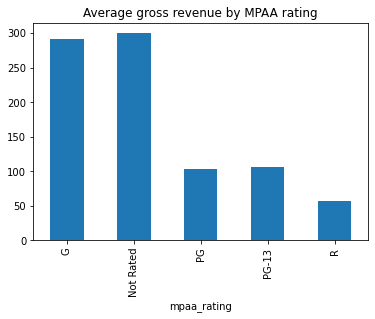

In [33]:
df.groupby('mpaa_rating')['gross'].mean().plot(kind='bar',title='Average gross revenue by MPAA rating');

In [41]:
df.release_date.min(),df.release_date.max()

('1937-12-21', '2016-12-16')

In [49]:
# Q3: What are the highest-grossing genres in the last 5 years? (Groupby genre,
df['release_date']=pd.to_datetime(df['release_date'],infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 513 entries, 0 to 578
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   movie_title   513 non-null    object        
 1   release_date  513 non-null    datetime64[ns]
 2   genre         513 non-null    object        
 3   mpaa_rating   513 non-null    object        
 4   gross         513 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 40.2+ KB


In [58]:
df2=df[df.release_date>'2013-1-1']
df2.head()


,movie_title,release_date,genre,mpaa_rating,gross
531,Oz the Great and Powerful,2013-03-08,Adventure,PG,243.434130
532,Iron Man 3,2013-05-03,Action,PG-13,424.084233
533,Monsters University,2013-06-21,Adventure,G,278.395641
534,The Lone Ranger,2013-07-02,Western,PG-13,92.597388
535,Disney Planes,2013-08-09,Comedy,PG,93.614037


In [59]:
df2.groupby(['genre'])['gross'].sum()

genre
Action               1784.344704
Adventure            5964.439760
Comedy                247.264317
Documentary            42.674054
Drama                 399.651496
Musical               130.894237
Romantic Comedy        55.961409
Thriller/Suspense      99.883312
Western                92.597388
Name: gross, dtype: float64

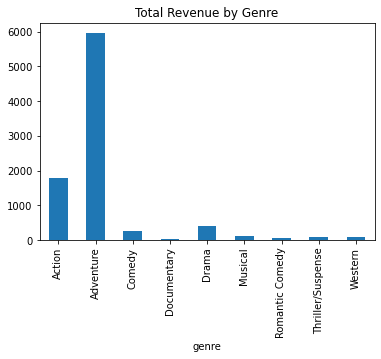

In [60]:
df2.groupby(['genre'])['gross'].sum().plot(kind='bar',title='Total Revenue by Genre');

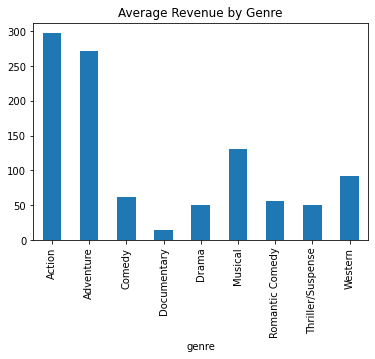

In [61]:
df2.groupby(['genre'])['gross'].mean().plot(kind='bar',title='Average Revenue by Genre');

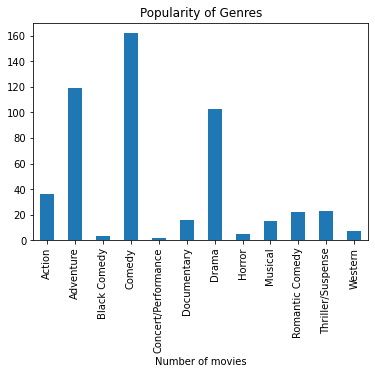

In [62]:
df.groupby('genre')['movie_title'].count().plot(kind='bar',title='Popularity of Genres',xlabel='Number of movies');

In [ ]:
# Grouped bar chart

In [ ]:
# Q4: (Temporal analysis) - How did the average annual gross revenue change in the last 50 years?

In [72]:
df3=df[df.release_date>'1990-1-1']
df3['year']=df3['release_date'].dt.year
df3.head()

<ipython-input-72-825d0b934a65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['year']=df3['release_date'].dt.year


,movie_title,release_date,genre,mpaa_rating,gross,year
85,Stella,1990-02-02,Drama,PG-13,40.077147,1990
87,Pretty Woman,1990-03-23,Romantic Comedy,R,356.389765,1990
88,Ernest Goes to Jail,1990-04-06,Comedy,PG,49.999822,1990
89,Spaced Invaders,1990-04-27,Comedy,PG,29.964452,1990
90,Fire Birds,1990-05-24,Action,PG-13,29.485923,1990


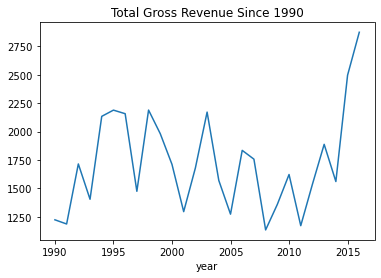

In [74]:
df3.groupby('year')['gross'].sum().plot(kind='line',title='Total Gross Revenue Since 1990');

In [ ]:
# 